# Kaggle House Competition Notebook
This Notebook is inteded as an attempt at the kaggle house competition. It is meant to illustrate all aspects of workflow from Data loading over data analysis to model predictions

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "data/train.csv"
train = pd.read_csv(filename)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
subclass = train["MSSubClass"]
subclass_counts = subclass.value_counts()
subclass_counts

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [5]:
subclasses = subclass.unique()
subclasses.sort()
subclass_counts = subclass_counts[subclasses]

<AxesSubplot:>

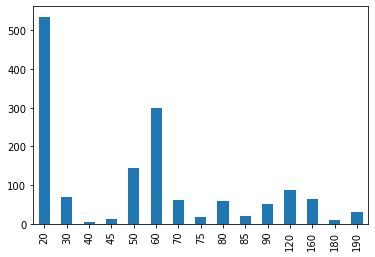

In [6]:
subclass_counts.plot.bar()

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

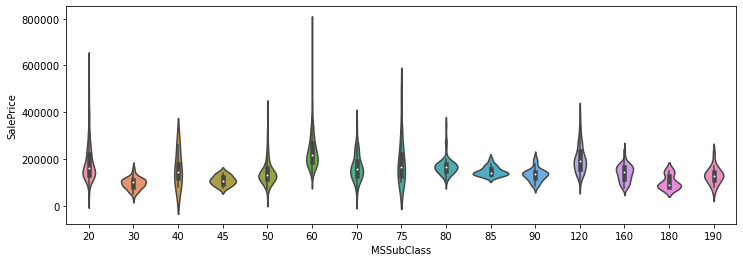

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4))
sns.violinplot(data = train, x = "MSSubClass", y = "SalePrice" , ax = ax)

/Users/jens/miniconda3/envs/stcti/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

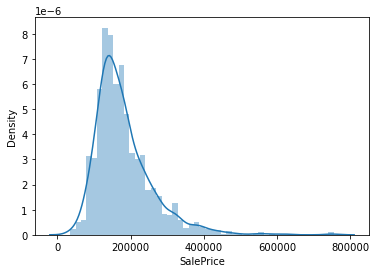

In [8]:
sns.distplot(train["SalePrice"])

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))

ax.barplot(range(len(subclasses))subclass, bins = subclasses)
plt.xticks(ticks = range(len(subclasses)), labels = subclasses)

SyntaxError: invalid syntax (2015392164.py, line 3)

(array([536.,  69.,   4.,  12., 144., 299.,  60.,  16.,  58.,  20.,  52.,
         87.,  63.,  40.]),
 array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
        180, 190]),
 <BarContainer object of 14 artists>)

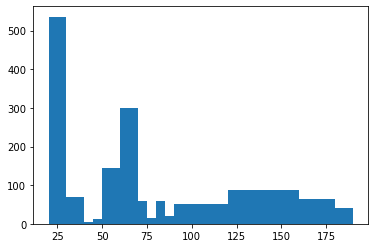

In [10]:
plt.hist(subclass, bins = subclasses)

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train.LotArea, train.SalePrice)

ValueError: Expected 2D array, got 1D array instead:
array=[ 8450  9600 11250 ...  9042  9717  9937].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.